<a href="https://colab.research.google.com/github/NehaKumari500092077/Machine-Learning-Lab/blob/main/Session_6_Assignments_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

# 1) Load and preprocess the Bike Sharing dataset – check for missing and duplicate values and remove them when detected.

In [ ]:
df = pd.read_csv('/content/hour.csv')
df = df.drop(['instant','dteday'],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.0 MB


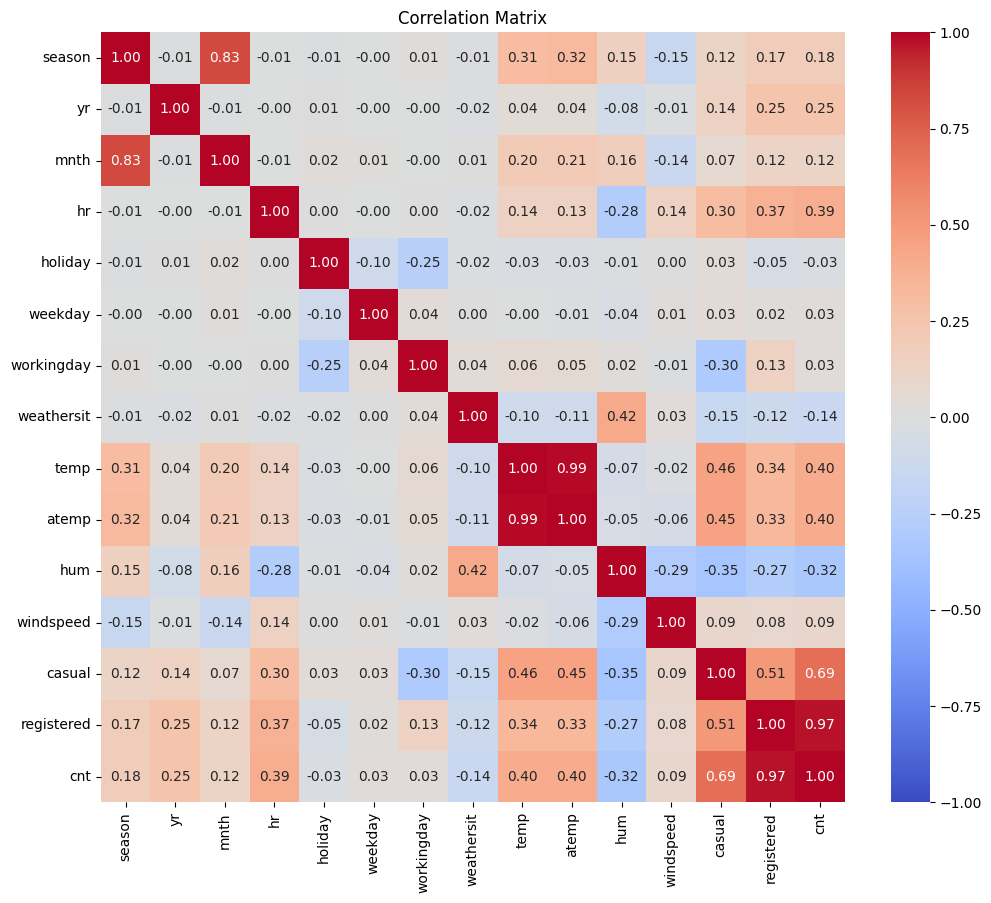

In [ ]:
import seaborn as sns
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Check if there is any missing values in the data or not
any_missing = df.isnull().sum().sum() > 0
print(any_missing)

if any_missing:
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")


False
There are no missing values in the DataFrame.


In [ ]:
# Check if there is any duplicate values in the dataframe or not
duplicate_count = df.duplicated().sum()

print(f"There are {duplicate_count} duplicate rows in the DataFrame.")
df = df.drop_duplicates()

print(df.duplicated().sum())

There are 2 duplicate rows in the DataFrame.
0


# 2) Perform one-hot encoding of the categorical features when necessary (note it is not necessary if there is a natural ordering between categories) and perform feature scaling.

In [ ]:
categorical_features = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']

df = pd.get_dummies(df, columns = categorical_features, drop_first=True)

In [ ]:
df = df.replace({True: 1, False: 0})

In [ ]:
y = df['cnt']
X = df.drop(['cnt','casual','registered'],axis = 1)
X

,temp,atemp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
0,0.24,0.2879,0.81,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.2576,0.60,0.1642,0,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
17375,0.26,0.2576,0.60,0.1642,0,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
17376,0.26,0.2576,0.60,0.1642,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
17377,0.26,0.2727,0.56,0.1343,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
# Identify numerical features
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']

# Initialize the MinMax scaler
scaler = MinMaxScaler()


# Apply the scaler to numerical features
X[numerical_features] = scaler.fit_transform(X[numerical_features])


# 3) Divide the data into training, validation and test sets (70%-15%-15%).

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Train-validation-test split (70%-15%-15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)
X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# 4) Design a neural network having N hidden layers and the number of units in each hidden layer as 128, 32, 64, 32, and so on. Use the ReLU activation function in each hidden layer. What activation function should you choose for the output layer for this prediction problem? Design the model accordingly.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class BikeSharingNet(nn.Module):
    def __init__(self, input_size = 53, N = 5):
        super(BikeSharingNet, self).__init__()
        self.layers = nn.ModuleList()

        units = [128, 64, 32, 16, 8]
        self.layers.append(nn.Linear(input_size,units[0]))

        # Add N hidden layers
        for i in range(1,N):
            in_features = units[(i-1)%len(units)]
            out_features = units[i % len(units)]
            self.layers.append(nn.Linear(in_features, out_features))

        # Output layer for regression
        self.output_layer = nn.Linear(units[(N-1) % len(units)], 1)

    def forward(self, x):
        for layer in self.layers:
            x = torch.relu(layer(x))

        x = self.output_layer(x)
        return x

# Initialize the model with a certain number of hidden layers
model = BikeSharingNet()


In [ ]:
# We can use "Linear" activation function for the output layer
# Because original target denotes the count of total rental bikes including both casual and registered

# 5) Define a cost function suitable for this problem and use the SGD optimizer

In [ ]:
# For this dataset, which is a regression problem, the suitable cost function is the Mean Squared Error (MSE).
# Cost function: MSE

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
input_size = X_train.shape[1]

# Perform cross-validation to find the best value of N using grid search

• Plot the training and validation losses for each value of N (on the same graph).

Fold: 1, Training Loss: 12719.972656388283, Validation Loss: 4870.219542739105
Fold: 2, Training Loss: 536966.2760459381, Validation Loss: 104150.0963671875
Fold: 3, Training Loss: 536921.8092537354, Validation Loss: 104150.0963671875
Fold: 4, Training Loss: 258257.21457070313, Validation Loss: 50082.62557089844
Fold: 5, Training Loss: 537014.1801331207, Validation Loss: 104150.0963671875


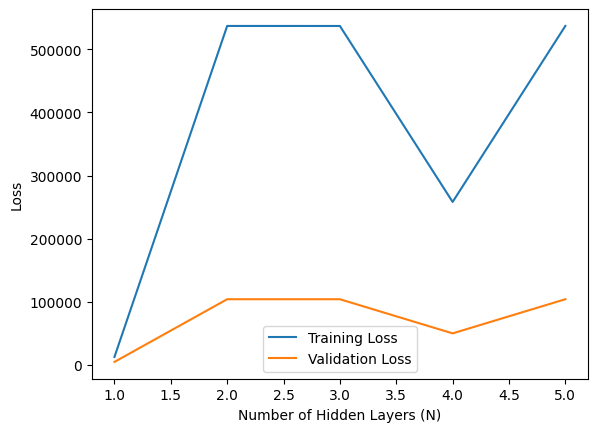

The best number of hidden layers (N) is: 1


In [ ]:
from sklearn.model_selection import KFold

# Define the range of N to test
n_range = [1,2,3,4,5]
n_splits = 5
num_epochs = 100

best_n = None
best_loss = float('inf')
best_model = None
training_losses = []
validation_losses = []
best_training_losses = []
best_validation_losses = []

for n in n_range:
    train_loss = np.zeros((num_epochs))
    test_loss = np.zeros((num_epochs))

    model = BikeSharingNet(input_size = input_size,N = n)
    optimizer = optim.SGD(model.parameters(), lr=0.001)

    # Training loop
    for epoch in range(num_epochs):
      model.train()
      for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        outputs = outputs.squeeze(1)
        loss = criterion(outputs, batch_y)
        train_loss[epoch] += loss.item()
        loss.backward()
        optimizer.step()


      # Validation loop
      model.eval()
      for val_X,val_y in val_loader:
        with torch.no_grad():
          val_outputs = model(val_X)
          val_outputs = val_outputs.squeeze(1)
          val_loss = criterion(val_outputs, val_y)
          test_loss[epoch] += val_loss.item()

    # Calculate mean losses
    mean_train_loss = sum(train_loss) / (len(train_loss)*num_epochs)
    mean_val_loss = sum(test_loss) / (len(test_loss)*num_epochs)

    print(f"Fold: {n}, Training Loss: {mean_train_loss}, Validation Loss: {mean_val_loss}")

    training_losses.append(mean_train_loss)
    validation_losses.append(mean_val_loss)

    # Update best N
    if mean_val_loss < best_loss:
        best_loss = mean_val_loss
        best_n = n
        best_model = model
        torch.save(model.state_dict(), 'best_model_weights.pth')
        best_training_losses = train_loss
        best_validation_losses = test_loss

# Plotting training and validation losses for each N
import matplotlib.pyplot as plt

plt.plot(n_range, training_losses, label='Training Loss')
plt.plot(n_range, validation_losses, label='Validation Loss')
plt.xlabel('Number of Hidden Layers (N)')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(f"The best number of hidden layers (N) is: {best_n}")


# What is the best value of the number of hidden layers (N) for this problem?
Justify your answer.

• For the model trained with the best value of N that you reported in the previous
question, report the MSE on the test set.

• Show a scatter plot of the predictions against the true values for the predictions
for the best model that you obtained.

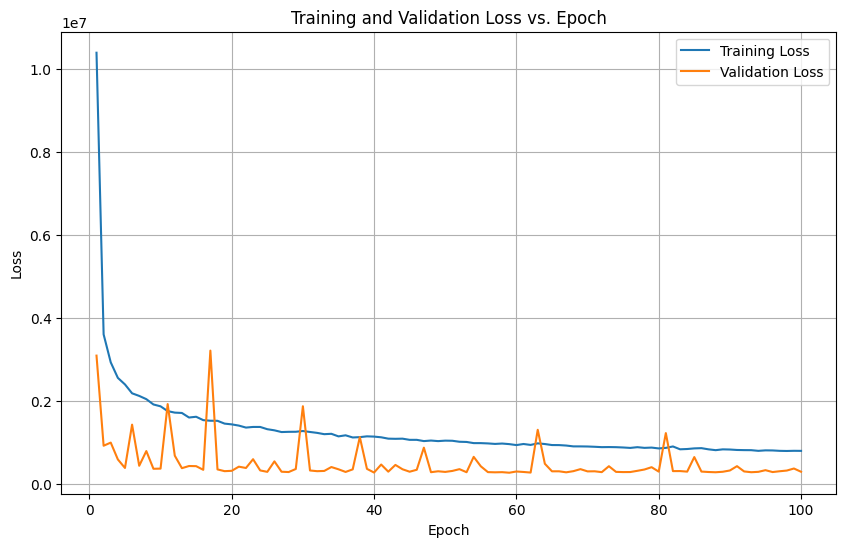

In [ ]:
# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), best_training_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), best_validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Final model with the best N
# Load the best model's weights
best_model = BikeSharingNet(input_size = input_size,N = best_n)
state_dict = torch.load('best_model_weights.pth', weights_only=True)
best_model.load_state_dict(state_dict)

optimizer = optim.SGD(best_model.parameters(), lr=0.001)

# Convert test data to tensors
X_train_tensor = X_train.clone().detach().requires_grad_(True)
y_train_tensor = y_train.clone().detach().requires_grad_(True)
X_test_tensor = X_test.clone().detach().requires_grad_(True)
y_test_tensor = y_test.clone().detach().requires_grad_(True)

print(X_train_tensor.shape)
print(X_test_tensor.shape)
print(y_train_tensor.shape)
print(y_test_tensor.shape)

torch.Size([12163, 53])
torch.Size([2607, 53])
torch.Size([12163])
torch.Size([2607])


Root Mean Squared Error (MSE) on the test set: 1852.328369140625


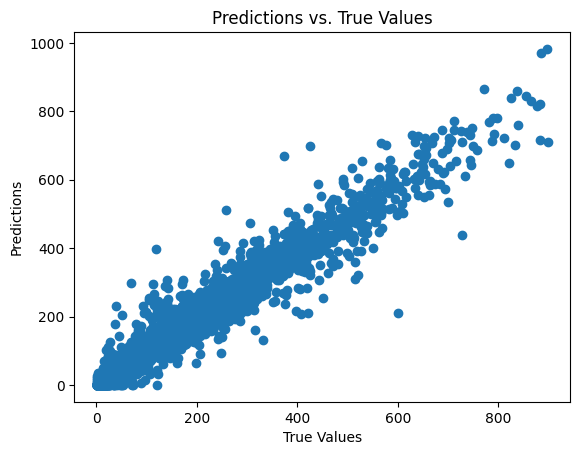

In [ ]:
# Evaluate on the test set
best_model.eval()
with torch.no_grad():
    test_outputs = best_model(X_test_tensor)
    test_outputs = test_outputs.squeeze(1)
    test_loss = criterion(test_outputs, y_test_tensor).item()

print(f"Root Mean Squared Error (MSE) on the test set: {test_loss}")
plt.scatter(y_test, test_outputs.numpy())
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs. True Values')
plt.show()
